<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_4_BERT_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget
!pip install ktrain

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=fc1d635e5eccd8f34c029673b9e06dd3aa6b2095c503adbaa4c32d0bbd528ba9
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 92kB 4.6MB/s 
     |████████████████████████████████| 1.0MB 19.1MB/s 
     |████████████████████████████████| 245kB 42.5MB/s 
     |████████████████████████████████| 1.8MB 38.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.2-cp36-none-any.whl size=113492 sha256=6b3cfa2295d0b6772cf5e942631f066801a56c5f8e520d3efb7be0f793af4eec
  Stored in directory: /root/.cache/pip/wheels/ed/db/bd/fb2cb12563e8a7e5ef04f99cc9014bc0e509f1bb3834e6ee5d
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=7980440f50a30ad83abcafb41e0d4a6227ca24cd578683ede06eb7375a6c76ce
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a

In [ ]:
import wget

jokes_path = "reddit_jokes.json"
url = 'https://raw.githubusercontent.com/taivop/joke-dataset/master/reddit_jokes.json'
wget.download(url, jokes_path)

'reddit_jokes.json'

In [ ]:
import json

jokes = []
fun_limit = 10
fun_total = 0
not_total = 0
with open(jokes_path) as json_file:
    data = json.load(json_file)
    for d in data:
      joke = d['title'] + " " + d['body']      
      if d['score'] > fun_limit:      
        jokes.append([joke,1])
        fun_total += 1
      else:
        jokes.append([joke,0])
        not_total += 1
print(jokes[244]) 
print(fun_total, not_total)  

["Why isn't Hitler playing in Esports? I wonder why Hitler haven't been invited to a Epsorts event yet. His KD ratio was 6,000,000 to 1.", 1]
58927 135626


In [ ]:
import random

data = random.sample(jokes, 5000)
print(data)

[['What kind of fruit never leaves the bowl. Cantaloupe ', 0], ["PornHub is releasing a dating app. It's called Pokéahoe Go: Std edition. Gotta catch them all!", 0], ['Did Ilean ever get in touch with you? "Ilean who?"\n\nI lean over and you kiss my ass!', 0], ['What Memories? \nThree older ladies were discussing the travails of getting older.  One said, "Sometimes I catch myself with a jar of mayonnaise in my hand in front of the refrigerator and can\'t remember whether I need to put it away, or start making a sandwich."\nThe second lady chimed in, "Yes, sometimes I find myself on the landing of the stairs and can\'t remember whether I was on my way up or on my way down.\nThe third one responded, "Well, I\'m glad I don\'t have that problem; knock on wood!" as she rapped her knuckles on the table, then told them "That must be the door, I\'ll get it!"\n', 1], ['A grasshopper walk into a bar. The bartender says, "Hey,  I\'ve got a drink named after you!"\n\nThe grasshopper replies, "You\

In [ ]:
cut = int(len(data) * 0.8)
x_train = [row[0] for row in data][:cut]
x_test = [row[0] for row in data][cut:]
y_train = [row[1] for row in data][:cut]
y_test = [row[1] for row in data][cut:]

print(len(x_train))

4000


In [ ]:
import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=['not','funny'],
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1, 
                                                                       maxlen=250, 
                                                                       max_features=35000)

preprocessing train...
language: en


preprocessing test...
language: en


Is Multi-Label? False
maxlen is 250
done.
simulating training for different learning rates... this may take a few moments...
Train on 4000 samples
Epoch 1/1024
4000/4000 [==============================] - 156s 39ms/sample - loss: 0.6470 - acc: 0.6380
Epoch 2/1024
3372/4000 [========================>.....] - ETA: 23s - loss: 0.9485 - acc: 0.6266

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


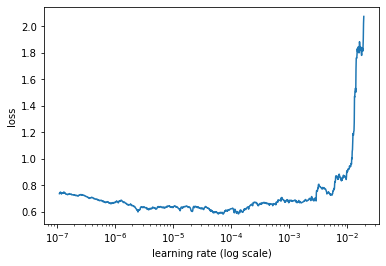

In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

learner.lr_find()
learner.lr_plot()

In [ ]:
learner.autofit(2e-5, 5)



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 3018 samples
Epoch 1/5
3018/3018 [==============================] - 238s 79ms/sample - loss: 0.5437 - acc: 0.7664
Epoch 2/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.5175 - acc: 0.7773
Epoch 3/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.4785 - acc: 0.7813
Epoch 4/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.3941 - acc: 0.8118
Epoch 5/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.2688 - acc: 0.8933


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['not', 'funny']

In [ ]:
predictor.predict('A man walked into a bar. The bartender yelled back, get out, were closed.')

'not'

In [ ]:
predictor.predict('If I had a dime for every time someone called me pretty I would have 10 cents.')

'not'